In [2]:
import pandas as pd
import numpy as np


In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('FAOSTAT_data_es_1-16-2025.csv')



In [4]:
#visualize the data contained in the Dataframe de forma clara y concisa
df.head()


,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código del producto (CPC),Producto,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo,Nota
0,QCL,Cultivos y productos de ganadería,724,España,5312,Área cosechada,1450.0,"Aceitunas, olivas",1961,1961,ha,NaN,M,"Valor ausente (los datos no pueden existir, no...",NaN
1,QCL,Cultivos y productos de ganadería,724,España,5510,Producción,1450.0,"Aceitunas, olivas",1961,1961,toneladas,1863400.0,A,Cifra oficial,NaN
2,QCL,Cultivos y productos de ganadería,724,España,5312,Área cosechada,1450.0,"Aceitunas, olivas",1962,1962,ha,NaN,M,"Valor ausente (los datos no pueden existir, no...",NaN
3,QCL,Cultivos y productos de ganadería,724,España,5510,Producción,1450.0,"Aceitunas, olivas",1962,1962,toneladas,1641000.0,A,Cifra oficial,NaN
4,QCL,Cultivos y productos de ganadería,724,España,5312,Área cosechada,1450.0,"Aceitunas, olivas",1963,1963,ha,NaN,M,"Valor ausente (los datos no pueden existir, no...",NaN


In [5]:
#de que tipo de datos son las columnas
df.dtypes


Código del ámbito             object
Ámbito                        object
Código del área (M49)          int64
Área                          object
Código del elemento            int64
Elemento                      object
Código del producto (CPC)    float64
Producto                      object
Código del año                 int64
Año                            int64
Unidad                        object
Valor                        float64
Símbolo                       object
Descripción del Símbolo       object
Nota                          object
dtype: object

In [6]:
#estadiaticas descriptivas
df.describe()

,Código del área (M49),Código del elemento,Código del producto (CPC),Código del año,Año,Valor
count,18346.0,18346.000000,18346.000000,18346.000000,18346.000000,1.758900e+04
mean,724.0,5412.630437,1292.679495,1992.130764,1992.130764,2.540805e+05
std,0.0,82.321779,441.484080,17.839433,17.839433,9.295591e+05
min,724.0,5312.000000,111.000000,1961.000000,1961.000000,0.000000e+00
25%,724.0,5312.000000,1234.000000,1977.000000,1977.000000,2.388200e+03
50%,724.0,5412.000000,1342.020000,1993.000000,1993.000000,1.460000e+04
75%,724.0,5510.000000,1449.020000,2007.000000,2007.000000,6.198800e+04
max,724.0,5510.000000,1970.000000,2023.000000,2023.000000,1.207000e+07


In [7]:
#como son los valores unicos por columna y que tipo de datos son
df.nunique() 



Código del ámbito                1
Ámbito                           1
Código del área (M49)            1
Área                             1
Código del elemento              3
Elemento                         3
Código del producto (CPC)      109
Producto                       109
Código del año                  63
Año                             63
Unidad                           3
Valor                        13586
Símbolo                          5
Descripción del Símbolo          5
Nota                             1
dtype: int64

In [8]:
#cuales son los valores unicos de las columnas con menos de 10 valores unicos
for col in df.columns:
    if df[col].nunique() < 5:
        print(f"Columna: {col}")
        print(df[col].unique())
        print("\n\n")

Columna: Código del ámbito
['QCL']



Columna: Ámbito
['Cultivos y productos de ganadería']



Columna: Código del área (M49)
[724]



Columna: Área
['España']



Columna: Código del elemento
[5312 5510 5412]



Columna: Elemento
['Área cosechada' 'Producción' 'Rendimiento']



Columna: Unidad
['ha' 'toneladas' 'kg/ha']



Columna: Nota
[nan 'Cifras no oficiales']





In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18346 entries, 0 to 18345
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código del ámbito          18346 non-null  object 
 1   Ámbito                     18346 non-null  object 
 2   Código del área (M49)      18346 non-null  int64  
 3   Área                       18346 non-null  object 
 4   Código del elemento        18346 non-null  int64  
 5   Elemento                   18346 non-null  object 
 6   Código del producto (CPC)  18346 non-null  float64
 7   Producto                   18346 non-null  object 
 8   Código del año             18346 non-null  int64  
 9   Año                        18346 non-null  int64  
 10  Unidad                     18346 non-null  object 
 11  Valor                      17589 non-null  float64
 12  Símbolo                    18346 non-null  object 
 13  Descripción del Símbolo    18346 non-null  obj

In [10]:
#eliminar las columnas que no aportan informacion
df.drop(['Ámbito', 'Código del área (M49)', 'Código del ámbito','Nota', 'Descripción del Símbolo','Área'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18346 entries, 0 to 18345
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código del elemento        18346 non-null  int64  
 1   Elemento                   18346 non-null  object 
 2   Código del producto (CPC)  18346 non-null  float64
 3   Producto                   18346 non-null  object 
 4   Código del año             18346 non-null  int64  
 5   Año                        18346 non-null  int64  
 6   Unidad                     18346 non-null  object 
 7   Valor                      17589 non-null  float64
 8   Símbolo                    18346 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.3+ MB


In [11]:
#eliminar las filas que por la columna Símbolo sean del valor "M"
df = df[df['Símbolo'] != 'M']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17709 entries, 1 to 18345
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código del elemento        17709 non-null  int64  
 1   Elemento                   17709 non-null  object 
 2   Código del producto (CPC)  17709 non-null  float64
 3   Producto                   17709 non-null  object 
 4   Código del año             17709 non-null  int64  
 5   Año                        17709 non-null  int64  
 6   Unidad                     17709 non-null  object 
 7   Valor                      17589 non-null  float64
 8   Símbolo                    17709 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.4+ MB


In [13]:
df.head(30)

,Código del elemento,Elemento,Código del producto (CPC),Producto,Código del año,Año,Unidad,Valor,Símbolo
1,5510,Producción,1450.0,"Aceitunas, olivas",1961,1961,toneladas,1863400.0,A
3,5510,Producción,1450.0,"Aceitunas, olivas",1962,1962,toneladas,1641000.0,A
5,5510,Producción,1450.0,"Aceitunas, olivas",1963,1963,toneladas,3124300.0,A
7,5510,Producción,1450.0,"Aceitunas, olivas",1964,1964,toneladas,572700.0,A
9,5510,Producción,1450.0,"Aceitunas, olivas",1965,1965,toneladas,1656100.0,A
11,5510,Producción,1450.0,"Aceitunas, olivas",1966,1966,toneladas,2101500.0,A
13,5510,Producción,1450.0,"Aceitunas, olivas",1967,1967,toneladas,1372000.0,A
15,5510,Producción,1450.0,"Aceitunas, olivas",1968,1968,toneladas,2274300.0,A
17,5510,Producción,1450.0,"Aceitunas, olivas",1969,1969,toneladas,1738300.0,A
19,5510,Producción,1450.0,"Aceitunas, olivas",1970,1970,toneladas,2100000.0,A


In [14]:
# Celda para crear el pivot table
def transform_data(df):
    """
    Transforma los datos para tener una fila por producto y año,
    con columnas para Producción, Área cosechada y Rendimiento
    """
    # Crear un diccionario para el mapeo de nombres de columnas
    column_names = {
        'Producción': 'Produccion(toneladas)',
        'Área cosechada': 'Area_cosechada(ha)',
        'Rendimiento': 'Rendimiento(kg/ha)'
    }
    
    # Realizar el pivot
    df_transformed = df.pivot_table(
        index=['Código del producto (CPC)', 'Producto', 'Código del año', 'Año'],
        columns='Elemento',
        values='Valor',
        aggfunc='first'
    ).reset_index()
    
    # Renombrar las columnas
    df_transformed.rename(columns=column_names, inplace=True)
    
    # Reordenar las columnas
    column_order = [
        'Código del producto (CPC)',
        'Producto',
        'Código del año',
        'Año',
        'Produccion(toneladas)',
        'Area_cosechada(ha)',
        'Rendimiento(kg/ha)'
    ]
    
    # Asegurar que todas las columnas existan y estén en el orden correcto
    df_transformed = df_transformed[column_order]
    
    return df_transformed



In [15]:
# Aplicar la transformación
df_final = transform_data(df)



In [16]:
# Mostrar los primeros registros del dataframe transformado
print("Primeras filas del dataset transformado:")
df_final.head()



Primeras filas del dataset transformado:


Elemento,Código del producto (CPC),Producto,Código del año,Año,Produccion(toneladas),Area_cosechada(ha),Rendimiento(kg/ha)
0,111.0,Trigo,1961,1961,3438000.0,3890605.0,883.7
1,111.0,Trigo,1962,1962,4819545.0,4262540.0,1130.7
2,111.0,Trigo,1963,1963,4865360.0,4247015.0,1145.6
3,111.0,Trigo,1964,1964,3981000.0,4143000.0,960.9
4,111.0,Trigo,1965,1965,4719000.0,4260000.0,1107.7


In [17]:
# Verificar la información del nuevo dataframe
print("\nInformación del dataset transformado:")
df_final.info()




Información del dataset transformado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Código del producto (CPC)  6134 non-null   float64
 1   Producto                   6134 non-null   object 
 2   Código del año             6134 non-null   int64  
 3   Año                        6134 non-null   int64  
 4   Produccion(toneladas)      6133 non-null   float64
 5   Area_cosechada(ha)         5799 non-null   float64
 6   Rendimiento(kg/ha)         5657 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 335.6+ KB


In [18]:
# Verificar valores faltantes por columna
print("\nValores faltantes por columna:")
df_final.isnull().sum()


Valores faltantes por columna:


Elemento
Código del producto (CPC)      0
Producto                       0
Código del año                 0
Año                            0
Produccion(toneladas)          1
Area_cosechada(ha)           335
Rendimiento(kg/ha)           477
dtype: int64

In [19]:
# Mostrar estadísticas descriptivas del dataset transformado
print("\nEstadísticas descriptivas del dataset transformado:")
df_final.describe()


Estadísticas descriptivas del dataset transformado:


Elemento,Código del producto (CPC),Código del año,Año,Produccion(toneladas),Area_cosechada(ha),Rendimiento(kg/ha)
count,6134.000000,6134.000000,6134.000000,6.133000e+03,5.799000e+03,5657.000000
mean,1289.666038,1991.614770,1991.614770,5.821570e+05,1.426652e+05,12610.338271
std,439.278831,17.889331,17.889331,1.440741e+06,4.923780e+05,15951.543652
min,111.000000,1961.000000,1961.000000,0.000000e+00,0.000000e+00,0.000000
25%,1234.000000,1976.000000,1976.000000,7.400000e+03,2.198000e+03,1527.300000
50%,1342.010000,1992.000000,1992.000000,6.271467e+04,1.313700e+04,6479.600000
75%,1449.020000,2007.000000,2007.000000,3.705700e+05,4.329900e+04,17967.800000
max,1970.000000,2023.000000,2023.000000,1.207000e+07,4.412800e+06,102830.500000


In [23]:
# Verificar la consistencia de los datos
def verify_data_consistency(df_original, df_transformed):
    """
    Verifica la consistencia entre los datos originales y transformados
    """
    print("\nVerificación de consistencia de datos:")
    print("-" * 50)
    
    # Verificar número de productos únicos
    n_products_original = df_original['Producto'].nunique()
    n_products_transformed = df_transformed['Producto'].nunique()
    print(f"Productos únicos - Original: {n_products_original}, Transformado: {n_products_transformed}")
    
    # Verificar rango de años
    year_range_original = f"{df_original['Año'].min()} - {df_original['Año'].max()}"
    year_range_transformed = f"{df_transformed['Año'].min()} - {df_transformed['Año'].max()}"
    print(f"Rango de años - Original: {year_range_original}, Transformado: {year_range_transformed}")
    
    # Mostrar ejemplo de un producto específico para verificar la transformación
    sample_product = df_transformed['Producto'].iloc[0]
    print(f"\nEjemplo de transformación para: {sample_product}")
    
    print("\nDatos originales:")
    print(df[df['Producto'] == sample_product].head(6))
    
    print("\nDatos transformados:")
    print(df_transformed[df_transformed['Producto'] == sample_product].head(6))

# Ejecutar la verificación
verify_data_consistency(df, df_final)




Verificación de consistencia de datos:
--------------------------------------------------
Productos únicos - Original: 109, Transformado: 108
Rango de años - Original: 1961 - 2023, Transformado: 1961 - 2023

Ejemplo de transformación para: Trigo

Datos originales:
       Código del elemento        Elemento  Código del producto (CPC)  \
17337                 5312  Área cosechada                      111.0   
17338                 5412     Rendimiento                      111.0   
17339                 5510      Producción                      111.0   
17340                 5312  Área cosechada                      111.0   
17341                 5412     Rendimiento                      111.0   
17342                 5510      Producción                      111.0   

      Producto  Código del año   Año     Unidad      Valor Símbolo  
17337    Trigo            1961  1961         ha  3890605.0       A  
17338    Trigo            1961  1961      kg/ha      883.7       A  
17339    Trigo 

<Figure size 1500x800 with 0 Axes>

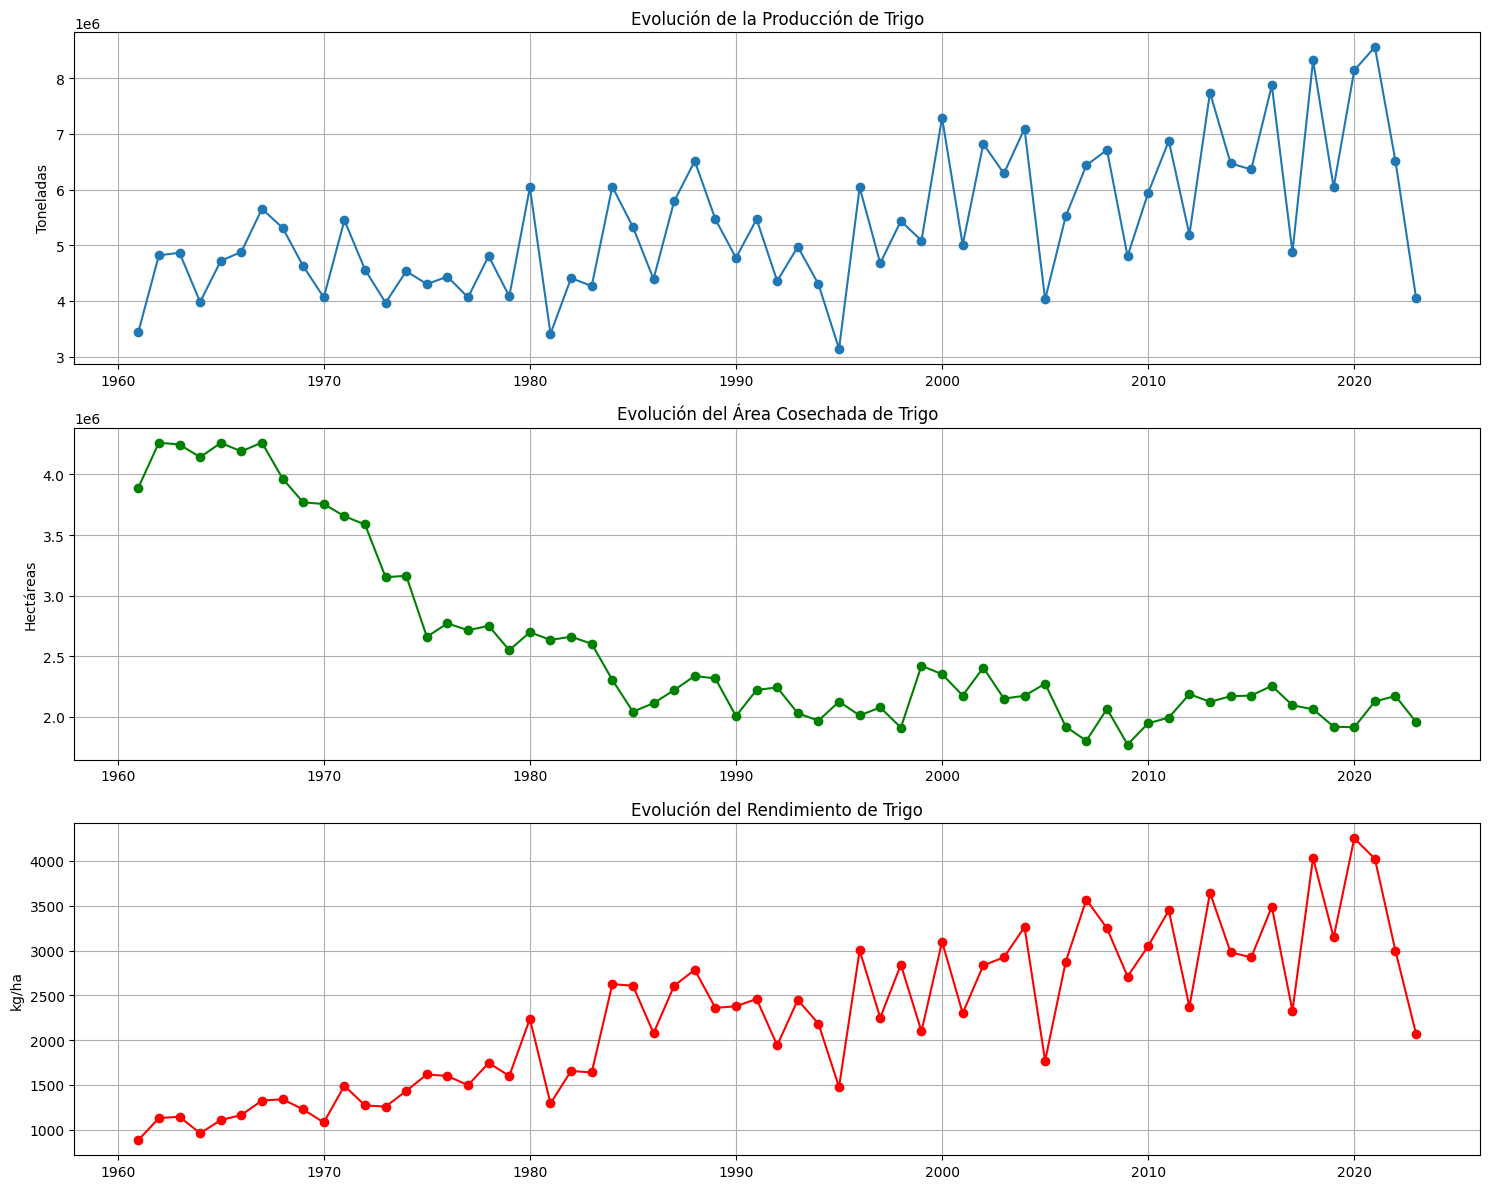

In [24]:
# Visualización de la evolución temporal de un producto específico
import matplotlib.pyplot as plt
import seaborn as sns

def plot_product_evolution(df_transformed, product_name):
    """
    Crea un gráfico de la evolución temporal de un producto específico
    """
    plt.figure(figsize=(15, 8))
    
    # Filtrar datos para el producto específico
    product_data = df_transformed[df_transformed['Producto'] == product_name]
    
    # Crear tres subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
    
    # Gráfico de Producción
    ax1.plot(product_data['Año'], product_data['Produccion(toneladas)'], marker='o')
    ax1.set_title(f'Evolución de la Producción de {product_name}')
    ax1.set_ylabel('Toneladas')
    ax1.grid(True)
    
    # Gráfico de Área Cosechada
    ax2.plot(product_data['Año'], product_data['Area_cosechada(ha)'], marker='o', color='green')
    ax2.set_title(f'Evolución del Área Cosechada de {product_name}')
    ax2.set_ylabel('Hectáreas')
    ax2.grid(True)
    
    # Gráfico de Rendimiento
    ax3.plot(product_data['Año'], product_data['Rendimiento(kg/ha)'], marker='o', color='red')
    ax3.set_title(f'Evolución del Rendimiento de {product_name}')
    ax3.set_ylabel('kg/ha')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

# Ejemplo de visualización para un producto específico
sample_product = df_final['Producto'].iloc[0]
plot_product_evolution(df_final, sample_product)

In [25]:
#exportar el dataframe a un archivo csv
df_final.to_csv('FAOSTAT_data_transformed.csv', index=False)